In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, kruskal
from math import sqrt

from scripts_python import wrangle
from scripts_python import explore


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

# Plot #1:

**In mvp-sa section Hypothesis testing, 1st plot, would like this side by side SA and Dallas
explore.sns_boxplot(train_exp)**


Acquire: compiling raw data files...


FileNotFoundError: [Errno 2] No such file or directory: 'data_csv_files/san_antonio_2018_tract.csv'

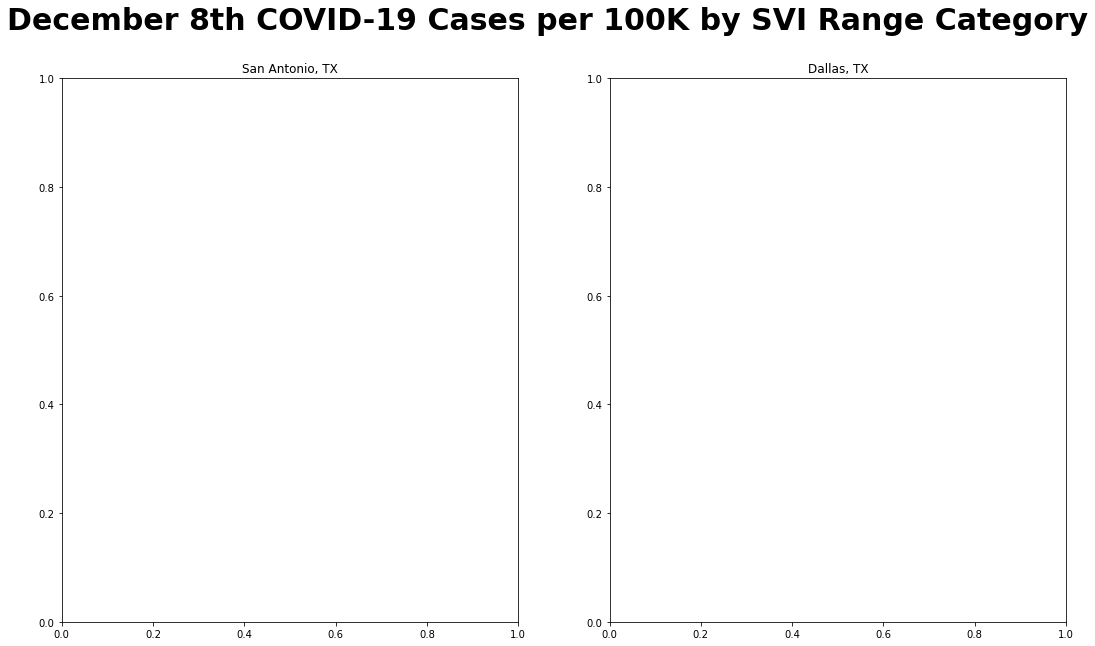

In [2]:

fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.suptitle('December 8th COVID-19 Cases per 100K by SVI Range Category', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.boxplot(ax=axes[0], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax1.set_ylim([-100, 10000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("Binned SVI Groups",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.boxplot(ax=axes[1], 
            data=train_exp, 
            x='bin_svi', 
            y='tract_cases_per_100k')
ax2.set_ylim([-100, 10000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("Binned SVI Groups",labelpad=20)

plt.show()

# Plot # 2:
**same with 2nd plot in that section
explore.joint_plot_index('raw_svi','tract_cases_per_100k', train_exp, 'bin_svi')**

In [ ]:

fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.suptitle('Distribution of Cases and SVI Score', fontsize=30, fontweight = 'bold')
axes[0].set_title('San Antonio, TX')
axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
ax1 = sns.scatterplot(ax = axes[0],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax1.set_ylim([-500,12000])
ax1.set_ylabel("Cases by Tract per 100k",labelpad=20)
ax1.set_xlabel("SVI Index Value",labelpad=20)
ax1.tick_params(axis ='x', labelsize ='small')


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
ax2 = sns.scatterplot(ax = axes[1],
                      x = 'raw_svi', 
                      y = 'tract_cases_per_100k', 
                      data = train_exp, 
                      hue = 'bin_svi')
ax2.set_ylim([-500,12000])
ax2.yaxis.set_visible(False)
ax2.tick_params(axis ='x', labelsize ='small')
ax2.set_xlabel("SVI Index Value",labelpad=20)

plt.show()


# Plot #3:

**The the distribution of cases, explore.hist_case(train_exp.tract_cases_per_100k)**

In [ ]:
## Code to Change
fig, axes = plt.subplots(1,2, figsize=(18, 10))
plt.suptitle('Distribution of Cases: December 8th 2020', fontsize=30, fontweight = 'bold')
#axes[0].set_title('San Antonio, TX')
#axes[1].set_title('Dallas, TX')

# San Antonio Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_data()
plt.subplot(1,2,1)
ax1 = plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.title('San Antonio, TX')
plt.xaxis(0, 100)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)


#Dallas Data
df, train_exp, X_train_scaled, y_train, X_test_scaled, y_test = wrangle.wrangle_dallas_data()
plt.subplot(1,2,2)
ax2 = plt.hist(x = train_exp.tract_cases_per_100k, 
               bins = 10, color = 'gray', 
               edgecolor='k', 
               alpha=0.45)
plt.title('Dallas, TX')
plt.xaxis(0, 100)
plt.axvline(train_exp.tract_cases_per_100k.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
min_ylim_v, max_ylim_v = plt.ylim()
plt.text(train_exp.tract_cases_per_100k.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(train_exp.tract_cases_per_100k.mean()))
plt.grid(b = True, alpha = .45)
plt.show()



# plt.hist(x = series, bins = 10, color = 'gray', edgecolor='k', alpha=0.45)
#     plt.title('Distribution of Cases in San Antonio, TX: December 8th 2020', y=1.02)
#     plt.xlabel('Number of Cases per 100,000',labelpad=20)
#     plt.ylabel('Tract Count',labelpad=20)
#     plt.axvline(series.mean(), color = 'tab:orange', linestyle='dashed', linewidth=5)
#     min_ylim_v, max_ylim_v = plt.ylim()
#     plt.text(series.mean()*1.05, max_ylim_v*0.9, 'Mean: {:.2f}'.format(series.mean()))
#     plt.grid(b = True, alpha = .45)